In [98]:
from webscraper.scrap_modules import my_NLP as myNLP 
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Code - NLP

load cleaned dataframe

In [99]:
with open("webscraper/cleaned_data/cleaned_dataframe.pkl", "rb") as file:
    df = pickle.load(file)
    

In [100]:
df.head(2)

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst


#### Language detection

In [101]:
dataframe = myNLP.add_language_values_to_df(df, search_column = 'job_description') # add language values 


Processing: 100%|██████████| 20941/20941 [03:12<00:00, 108.78it/s]


In [148]:
dataframe.head(20)

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword,language
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist,de
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
2,3720365801,(Junior) Data Engineer (m/f/d),Sandbox Interactive,"Berlin, Berlin, Germany",1 day ago,YOUR GAMEBuild and maintain the current data i...,Mid-Senior level,Full-time,Information Technology,Computer Games,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
3,3672508925,Financial Data Analyst (m/f/d),Ultramarin,"Berlin, Berlin, Germany",2 months ago,About The PositionWe are looking for a top-tie...,Mid-Senior level,Full-time,Information Technology,Financial Services,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
4,3695466781,Business Intelligence Analyst (f/m/d),Les Lunes,"Berlin, Berlin, Germany",4 weeks ago,Your missionAs a Business Intelligence Analyst...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Retail Apparel and Fashion,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
5,3585738180,Data Analyst,Orange Quarter,"Berlin, Berlin, Germany",5 months ago,Orange Quarter are working with an exciting st...,Entry level,Full-time,Information Technology,Staffing and Recruiting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
6,3585734564,Data Analyst,Orange Quarter,"Berlin, Berlin, Germany",5 months ago,Orange Quarter are currently looking for a Dat...,Entry level,Full-time,Information Technology,Staffing and Recruiting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
7,3704916810,BI Analyst (f/m/d),Enter,"Berlin, Berlin, Germany",3 weeks ago,Build the future with Enter.Our mission is to ...,Mid-Senior level,Full-time,Information Technology,Architecture and Planning,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
8,3585734595,Data Analyst,Orange Quarter,"Berlin, Berlin, Germany",5 months ago,We are currently working with an emerging SaaS...,Entry level,Full-time,Information Technology,Staffing and Recruiting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
9,3698396795,Senior Data Analyst,Klim,"Berlin, Berlin, Germany",1 month ago,"We are Klim, a Berlin-based clean-tech company...",Mid-Senior level,Full-time,Other,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en


In [103]:
dataframe['language'].value_counts()

language
de    12434
en     8495
fr        7
nl        2
pl        1
it        1
ko        1
Name: count, dtype: int64

#### Keyword Extraction 
https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/#:~:text=Textrank%20is%20a%20Python%20tool,compatible%20with%20the%20Spacy%20pipeline

In [104]:
import spacy 
import pytextrank 
import pandas as pd
import re

# !spacy download en_core_web_sm
# !spacy download de_core_news_sm

remove gender designations

In [177]:
# remove gender information
df['cp1_title'] = df["title"].progress_apply(myNLP.clean_up)

Processing: 100%|██████████| 20941/20941 [00:00<00:00, 385276.04it/s]


In [178]:
df['cp1_title'],

(0                              software engineer fullstack
 1                     data analyst - business intelligence
 2                                   (junior) data engineer
 3                                   financial data analyst
 4                            business intelligence analyst
                                ...                        
 20936    softwareentwickler:in frontend () - 100% home ...
 20937      dr. rer. nat. physik – simulation & experimente
 20938    (senior) manager process automation / ai & dat...
 20939                                   software-architect
 20940                     php developer  - remote possible
 Name: cp1_title, Length: 20941, dtype: object,)

remove text in parentheses

In [179]:
pattern_to_extract = r'\((.*?)\)'

# Extract text within parentheses and put it in a new column
df['text_in_parentheses'] = df['cp1_title'].progress_apply(lambda x: re.findall(pattern_to_extract, x))

# Convert lists with only one element to that element, and keep lists for multiple elements
df['text_in_parentheses'] = df['text_in_parentheses'].progress_apply(lambda x: x[0] if len(x) == 1 else x)

# Remove the text within parentheses 
df['cp1_title'] = df['cp1_title'].progress_apply(lambda x: re.sub(pattern_to_extract, '', x).strip())


Processing: 100%|██████████| 20941/20941 [00:00<00:00, 671397.71it/s]


clean dataframe based on several rounds of inspecting word clouds 

In [198]:
words_to_find = ['software', 'student', 'werkstudent', 'consultant', 'studium', 'senior', 'manager', 'wissenschaftlich']


df['exclude'] = df['cp1_title'].apply(lambda x: 'True' if any(word.lower() in x.lower() for word in words_to_find) else 'False')


In [199]:

cleaned_df = df[df['exclude']=="False"]
print(df.shape)
print(cleaned_df.shape)

all_text = cleaned_df['cp1_title']

total_text = " ".join(all_text) # combining all job title 

(20941, 17)
(10819, 17)


#### word cloud 

In [200]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [201]:
def word_cloud(text):   
    stopwords = STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(text)
    rcParams['figure.figsize'] = 10, 20
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    filtered_words = [word for word in text.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top words in the headlines vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()

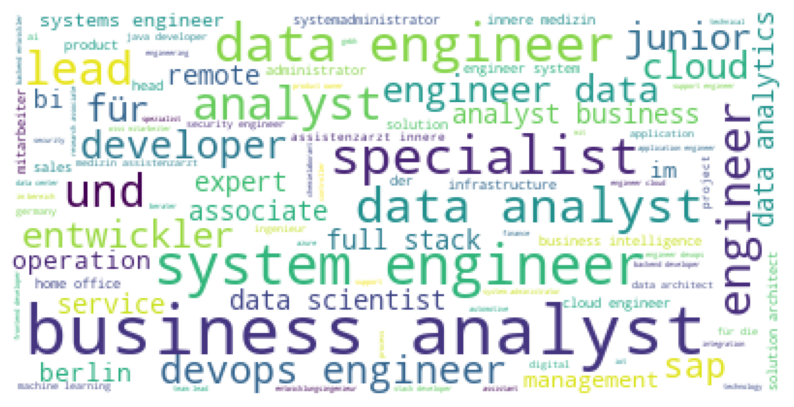

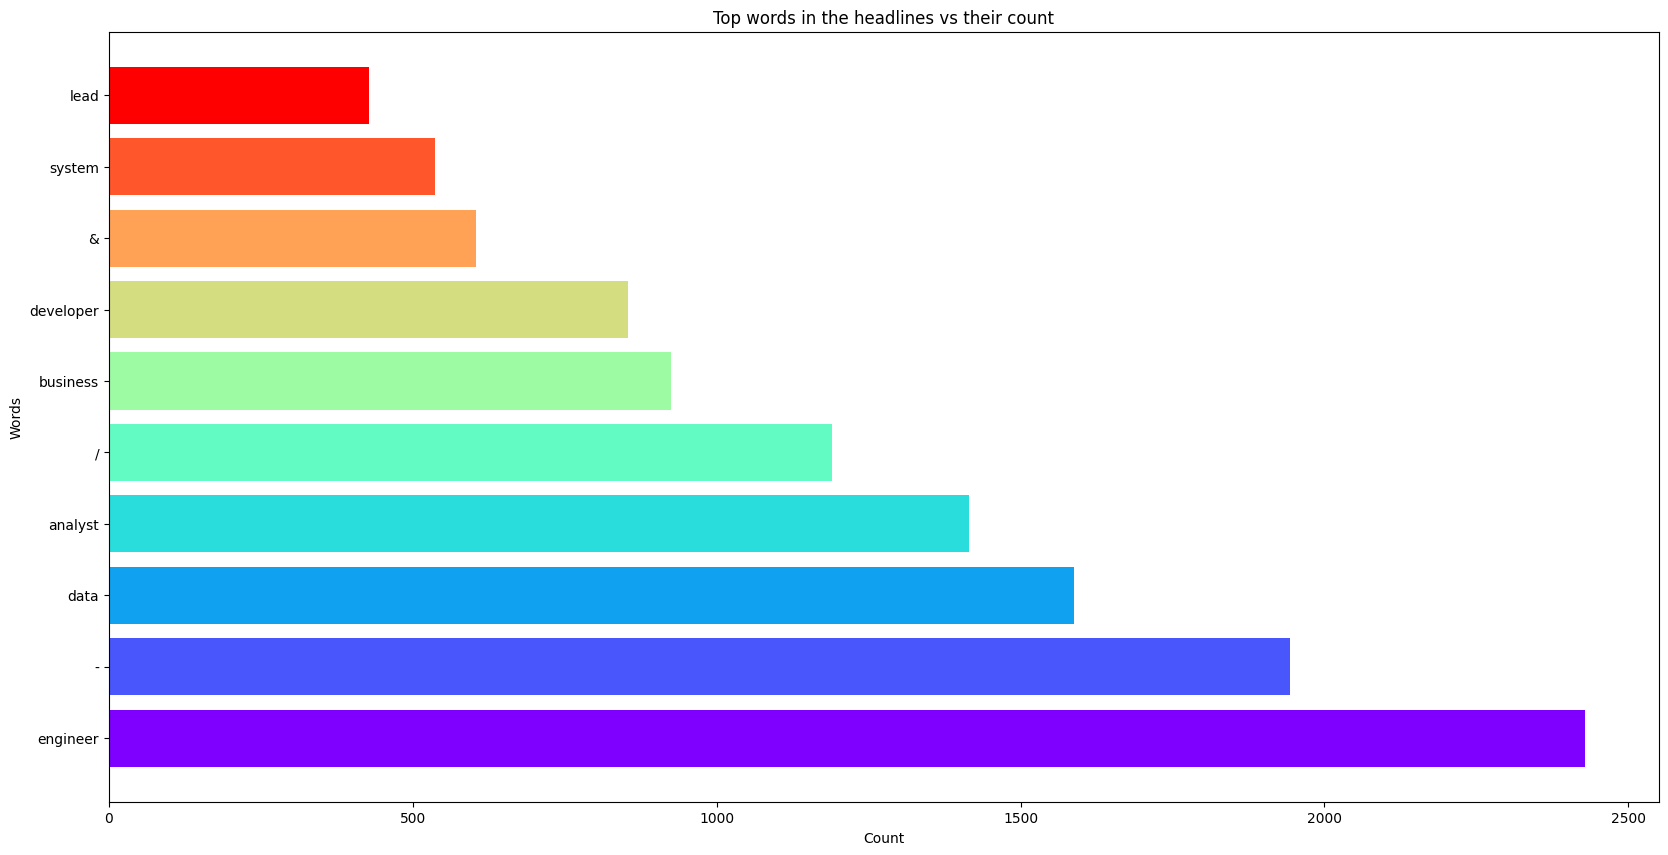

In [202]:
word_cloud(total_text)

Yake keyword extractor

In [203]:
import yake

kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(total_text)

In [204]:
for kw in keywords:
    print(kw)

('engineer data engineer', 4.682652699597934e-06)
('data engineer data', 5.716917880389599e-06)
('analyst business analyst', 9.34907052775754e-06)
('engineer system engineer', 1.2602734584084015e-05)
('business analyst business', 1.4713446835151245e-05)
('data engineer', 1.5301258715415907e-05)
('data analyst data', 1.54913456804529e-05)
('business analyst', 1.885490397227132e-05)
('engineer data analyst', 2.355697704985821e-05)
('engineer', 2.5620752534631668e-05)
('system engineer', 2.636285650141312e-05)
('data analyst', 2.6688815161435978e-05)
('analyst data analyst', 2.681755777731853e-05)
('analyst data engineer', 3.297976786980149e-05)
('engineer devops engineer', 3.3138427956563545e-05)
('engineer data', 3.4830496812723045e-05)
('engineer business analyst', 4.327207116438327e-05)
('data', 5.012850539372503e-05)
('analyst', 6.213319097068208e-05)
('cloud data engineer', 7.363969270592371e-05)


In [154]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [208]:
# Step 1: Data Preprocessing
## Lowercasing

## Tokenization and Removing Stop Words
stop_words = set(stopwords.words('english'))
cleaned_df['cp1_title'] = cleaned_df['cp1_title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

## Stemming
stemmer = PorterStemmer()
cleaned_df['cp1_title'] = cleaned_df['cp1_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_df['cp1_title'])

# Step 3: Clustering
kmeans = KMeans(n_clusters=5)  # Assuming 5 clusters
kmeans.fit(X)
cleaned_df['cluster'] = kmeans.labels_



# Step 4: Evaluation
# Manually evaluate the clusters or use metrics

# Step 5: Visualization (Optional)
# Use Matplotlib or Seaborn to visualize clusters

C:\Users\Domen\AppData\Local\Temp\ipykernel_180504\916199393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['cp1_title'] = cleaned_df['cp1_title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
C:\Users\Domen\AppData\Local\Temp\ipykernel_180504\916199393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['cp1_title'] = cleaned_df['cp1_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
c:\Users\Do

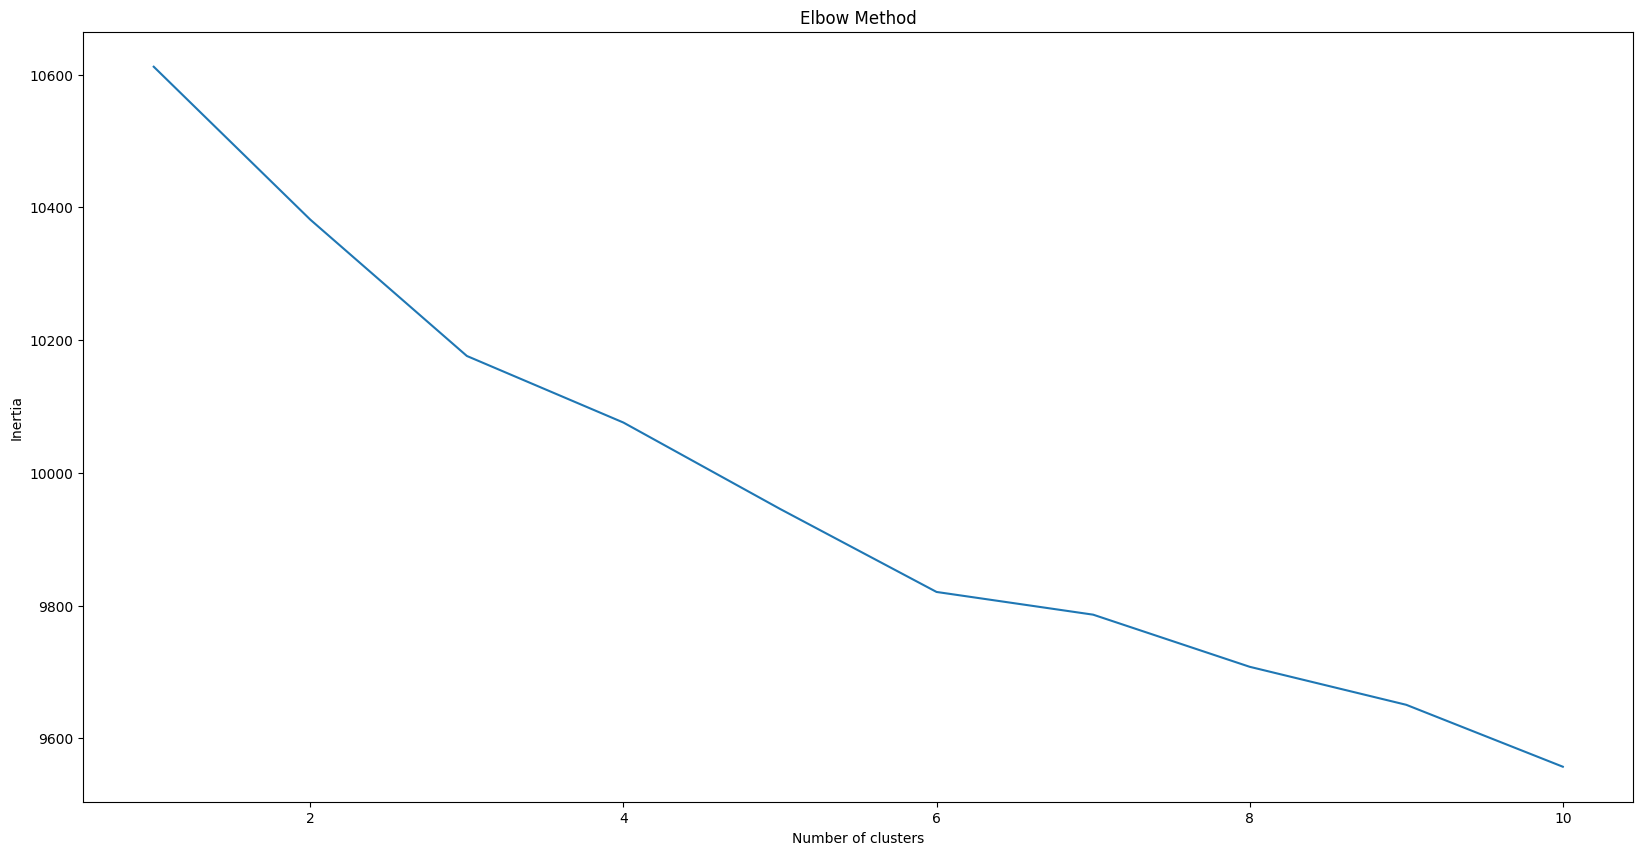

In [209]:
# Elbow Method to find optimal K
inertia = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the silhouette score is 0.01695281395369443


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the silhouette score is 0.024482790761143392


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the silhouette score is 0.024678907090581754


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the silhouette score is 0.026645658807838143


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the silhouette score is 0.02863547205057911


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the silhouette score is 0.03016838254034427


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the silhouette score is 0.028822688381475736


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the silhouette score is 0.03711732819345295


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the silhouette score is 0.04145439624653844


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11, the silhouette score is 0.041080218719297366


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12, the silhouette score is 0.03924196604661448


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13, the silhouette score is 0.04345109770602007


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14, the silhouette score is 0.043141075649728196


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15, the silhouette score is 0.04906734490016317


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 16, the silhouette score is 0.048364867080627434


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 17, the silhouette score is 0.04583261280268706


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 18, the silhouette score is 0.053212304353618435


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 19, the silhouette score is 0.04885656789175051


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20, the silhouette score is 0.05115848822466847


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 21, the silhouette score is 0.05686909275013409


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 22, the silhouette score is 0.06663995294579153


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 23, the silhouette score is 0.06300268572030998


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 24, the silhouette score is 0.06595517270587925


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25, the silhouette score is 0.06927353592657563


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 26, the silhouette score is 0.06784196041993752


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 27, the silhouette score is 0.06752849944727153


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 28, the silhouette score is 0.07393931520124031


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 29, the silhouette score is 0.06674197490160141


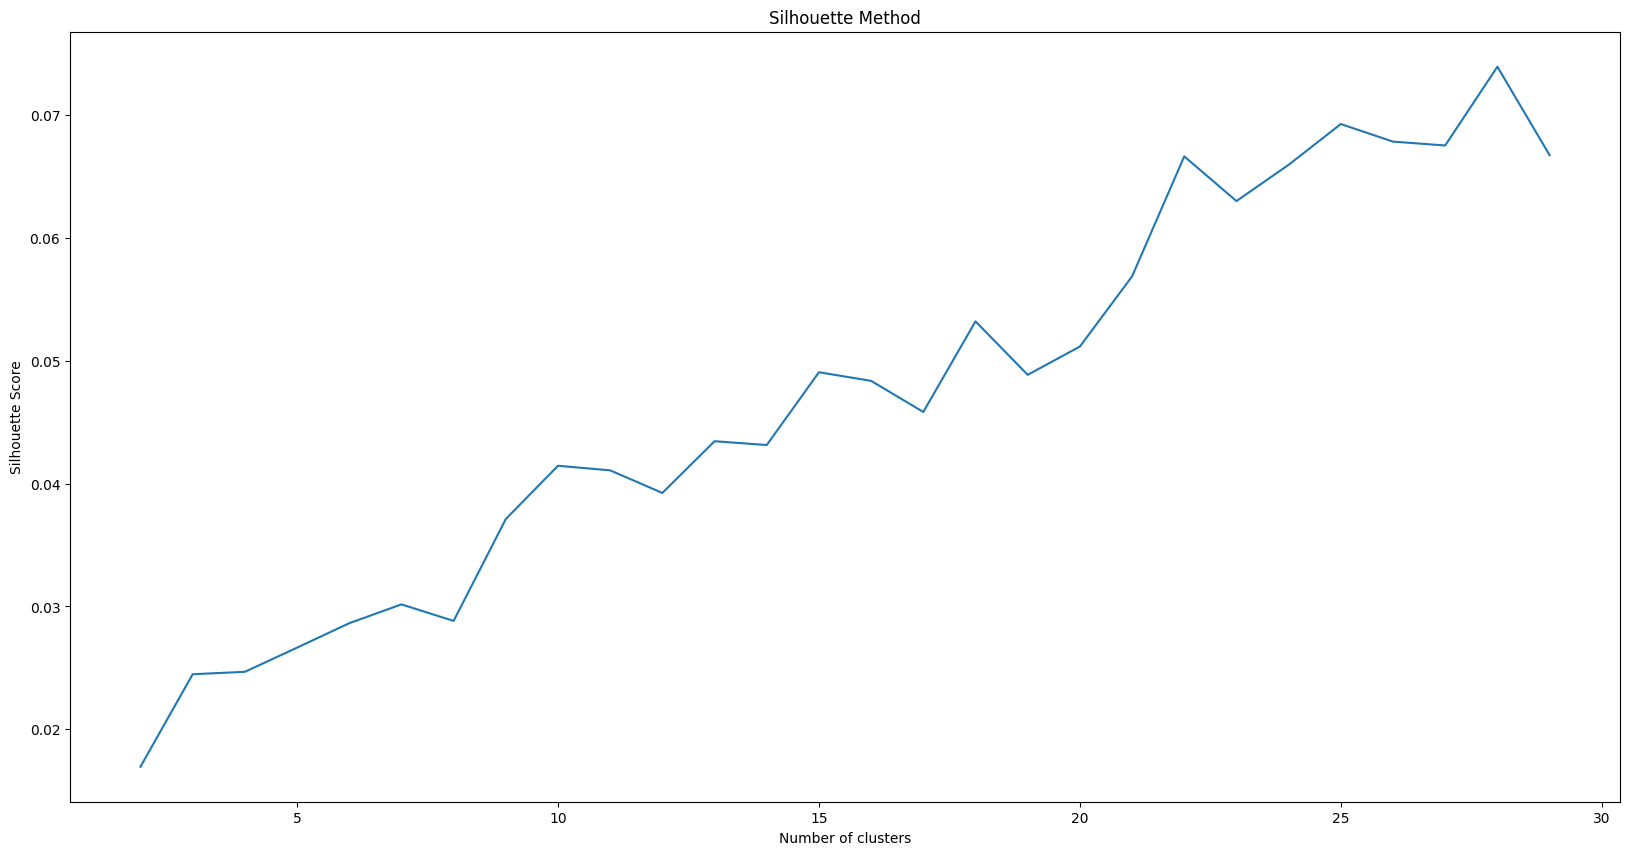

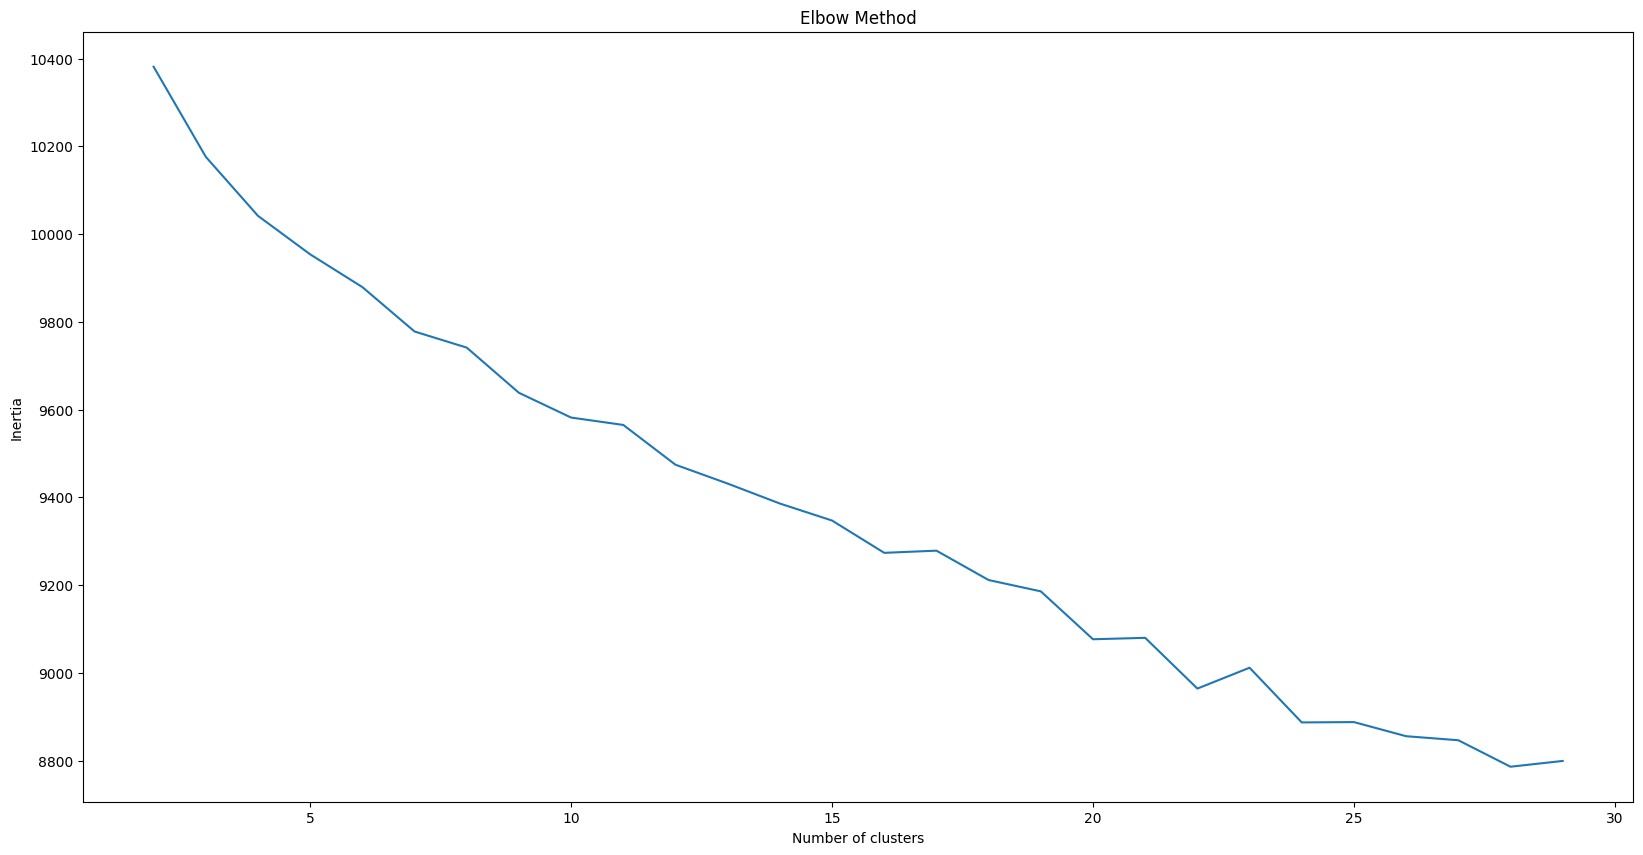

In [216]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize variables
silhouette_scores = []
inertia = []
# Loop through different numbers of clusters
for i in range(2, 30):  # Start from 2 as silhouette_score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append to the list
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg}")

# Plotting the silhouette scores
plt.plot(range(2, 30), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



plt.plot(range(2, 30), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()